# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**See PrairieLearn for _due date_ and _submission_**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024s/blob/main/docs/homework_instructions.md).

## Imports

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
    cross_val_predict,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

We see that the features include some details about the client, as well as extensive information about the client's past payments. While we believe both the demographic and the credit history features will prove useful in classifying whether a client will default, intuitively we think the credit history features will have more effect. 

<!-- END QUESTION -->

<br><br>

In [2]:
credit_df = pd.read_csv("./data/UCI_Credit_Card.csv", index_col = 0)
display(credit_df)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Type your answer here, replacing this text._

In [3]:
train_df, test_df = train_test_split(credit_df, test_size=0.3, random_state=76)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

<!-- END QUESTION -->

<br><br>

In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,21000.0,167563.508571,129919.112502,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.604381,0.488995,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.843905,0.789845,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.554667,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.412952,9.136302,21.0,28.00,34.0,41.00,79.0
PAY_0,21000.0,-0.012190,1.121864,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.132714,1.196554,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.168333,1.195375,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.223143,1.165490,-2.0,-1.00,0.0,0.00,8.0
PAY_5,21000.0,-0.265762,1.134210,-2.0,-1.00,0.0,0.00,8.0


Checking the counts of each feature, we see that there is no missing data as all the counts are the same.

In [5]:
# Create a dataframe for the ranges of all features
range_series = train_df.describe().loc['max'] - train_df.describe().loc['min']

range_df = pd.DataFrame(range_series, columns=['Range'])
display(range_df)

,Range
LIMIT_BAL,790000.0
SEX,1.0
EDUCATION,6.0
MARRIAGE,3.0
AGE,58.0
PAY_0,10.0
PAY_2,10.0
PAY_3,10.0
PAY_4,10.0
PAY_5,10.0


We see that the ranges of the numerical features such as AGE and PAY_AMT1 vary greatly, which suggests scaling will be useful.

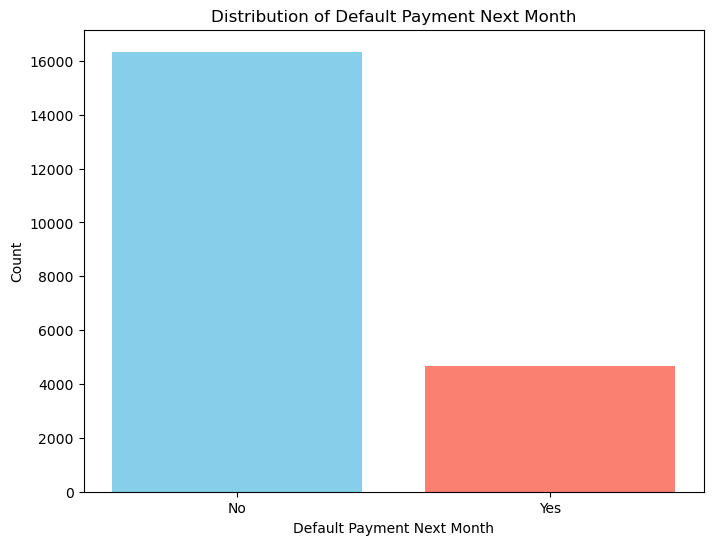

In [6]:
# Code to compare the amount of examples with default = 1 vs 0
default_distribution = train_df['default.payment.next.month'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(default_distribution.index, default_distribution.values, color=['skyblue', 'salmon'])
plt.title('Distribution of Default Payment Next Month')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

We see that the data is moderately imbalanced, so we will consider f1-score alongside accuracy as our metrics of assessment.

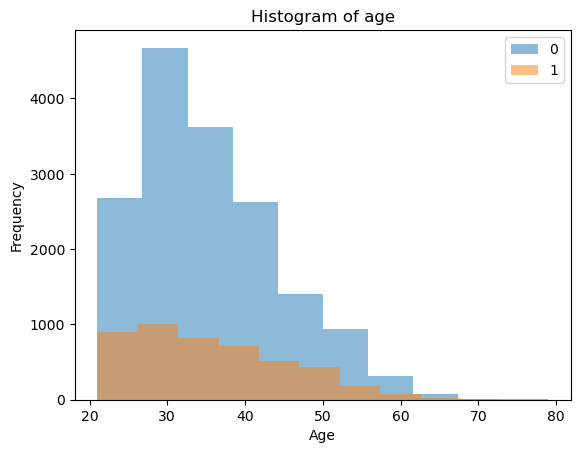

In [7]:
# code to plot the histogram of age
ax = train_df.groupby("default.payment.next.month")["AGE"].plot.hist(bins=10, alpha=0.5, legend=True)
plt.xlabel("Age")
plt.title("Histogram of " + "age")
plt.show()

Examining one of the demographic related features, we see that age has a strong relationship with whether the client will default or not. For example, the proportion of those clients that default is much higher for the early 20s age range compared to the 30 to 40s age range.

We can also see that we have much more examples from the 20-40s age range.

Our initial observations about the data:
 - The data is moderately imbalanced with about 25% of the examples being clients who defaulted
 - Scaling will be needed for the extreme differences in ranges in numerical features, no imputation is required for any features
 - Alongside accuracy, using f1-score will account for the imbalance in the data

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Type your answer here, replacing this text._

In [8]:
# Create X and y for training and test sets
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df[["default.payment.next.month"]]
X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df[["default.payment.next.month"]]

In [9]:
# Separate features based on type
numeric_features = [
    "LIMIT_BAL",
    "AGE",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6"
]
categorical_features = ["MARRIAGE"]
ordinal_features = [
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "EDUCATION"
]
binary_features = ["SEX"]

In [10]:
# Create transformers
# Adapted from Homework 3
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
pay_ordering = ["-2", "-1", "0", "1", "2", "3", "4", "5", "6", "7", "8"]
education_ordering = ["0", "1", "2", "3", "4", "5", "6"]
ordinal_transformer = OrdinalEncoder(categories=[pay_ordering,
                                                 pay_ordering,
                                                 pay_ordering,
                                                 pay_ordering,
                                                 pay_ordering,
                                                 pay_ordering, 
                                                 education_ordering])
binary_transformer = OneHotEncoder(drop="if_binary")

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features)
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

              precision    recall  f1-score   support

  No default     0.7781    1.0000    0.8752     16341
     Default     0.0000    0.0000    0.0000      4659

    accuracy                         0.7781     21000
   macro avg     0.3891    0.5000    0.4376     21000
weighted avg     0.6055    0.7781    0.6811     21000

Test Accuracy: 0.7781428571428571


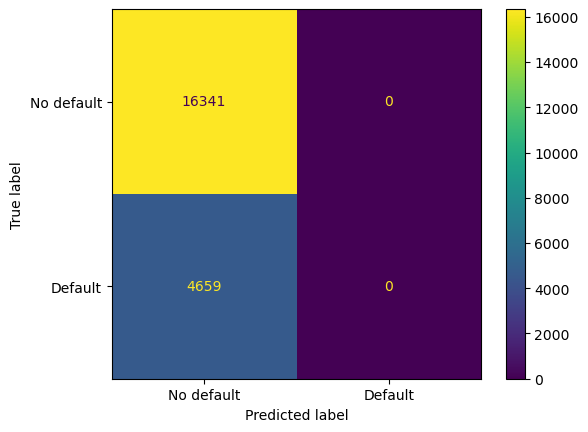

In [11]:

dummy = DummyClassifier(strategy = "most_frequent")
cv_preds = cross_val_predict(dummy, X_train, y_train, cv=5)

# generate confusion matrix (code from lecture 9)
ConfusionMatrixDisplay.from_predictions(
    y_train,
    cross_val_predict(dummy, X_train, y_train),
    display_labels=["No default", "Default"],
    values_format="d"
)


# create classification report (code from lecture 9)
dummy.fit(X_train, y_train)
print(
    classification_report(
        y_train, dummy.predict(X_train), target_names=["No default", "Default"], digits=4, zero_division=0
    )
)

pred = dummy.predict(X_train)
print(f"Test Accuracy: {accuracy_score(y_train,pred)}")



The accuracy is decent with 77.8% of examples predicted correctly. However, we see that the precision, recall, and f1-score of defaulting are all very low because the dummyclassifier is only predicted "no default" for all examples. So the dummy classifier has very poor performance. 

<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [12]:
# Adapted from Lecture 7
scores_dict = {
    "C": 10.0 ** np.arange(-3, 6, 1),
    "mean_fit_time": list(),
    "mean_score_time": list(),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
    "std_train_scores": list(),
    "std_cv_score": list()
}
for C in scores_dict["C"]:
    pipe_ridge = make_pipeline(preprocessor, LogisticRegression(C=C, max_iter=200))
    scores = cross_validate(pipe_ridge, X_train, y_train.values.ravel(), return_train_score=True, scoring='f1')
    scores_dict["mean_fit_time"].append(scores["fit_time"].mean())
    scores_dict["mean_score_time"].append(scores["score_time"].mean())
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())
    scores_dict["std_train_scores"].append(scores["train_score"].std())
    scores_dict["std_cv_score"].append(scores["test_score"].std())

results_df = pd.DataFrame(scores_dict)
results_df

,C,mean_fit_time,mean_score_time,mean_train_scores,mean_cv_scores,std_train_scores,std_cv_score
0,0.001,0.081400,0.013999,0.264503,0.265388,0.006281,0.028929
1,0.010,0.074801,0.013205,0.343224,0.342409,0.006842,0.022747
2,0.100,0.120402,0.012198,0.355095,0.354509,0.006347,0.021614
3,1.000,0.099408,0.012791,0.356832,0.355474,0.005986,0.022262
4,10.000,0.124202,0.011999,0.357037,0.355157,0.006283,0.022249
5,100.000,0.100400,0.011600,0.357392,0.355952,0.006101,0.022154
6,1000.000,0.100601,0.011999,0.357462,0.355622,0.005891,0.022792
7,10000.000,0.094600,0.011400,0.357288,0.355948,0.006191,0.022415
8,100000.000,0.135007,0.013392,0.357196,0.355890,0.005956,0.022398


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

### Random Forest Classifier

In [14]:
# Code to construct a RandomForestClassifier adapted from Lecture 11

pipe_rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(
        n_jobs=-1,
        random_state=123,
    ),
)
y_train_ravel = np.ravel(y_train)

scores = cross_validate(pipe_rf, X_train, y_train_ravel, return_train_score=True, scoring='f1')
RFC_df = pd.DataFrame(scores)
display(RFC_df)


,fit_time,score_time,test_score,train_score
0,0.627007,0.060993,0.471879,0.999463
1,0.659001,0.050002,0.499332,0.998927
2,0.643014,0.047987,0.466085,0.999195
3,0.667001,0.050000,0.457898,0.998792
4,0.638001,0.050001,0.481506,0.998793


The model would be clearly overfit to the training data as the train score is very high but in the case of RFC, this does not necessarily equal overfitting.  The f1 validation score is much better than the linear model (15% increase) but the model also takes more time to fit and score.

In [16]:
from sklearn.svm import SVC
pipe = make_pipeline(preprocessor, SVC())
SVC_results = pd.DataFrame(cross_validate(pipe, X_train, y_train.values.ravel(), return_train_score=True, scoring="f1"))
SVC_results

,fit_time,score_time,test_score,train_score
0,7.736035,2.396967,0.453237,0.469540
1,8.152055,2.526976,0.493671,0.470027
2,7.503003,2.340999,0.448373,0.476443
3,7.450966,2.593031,0.459574,0.473888
4,7.800964,2.892000,0.456583,0.474942


In [19]:
from sklearn.neighbors import KNeighborsClassifier
pipe = make_pipeline(preprocessor, KNeighborsClassifier())
KNN_results = pd.DataFrame(cross_validate(pipe, X_train, y_train.values.ravel(), return_train_score=True, scoring="f1"))
KNN_results

,fit_time,score_time,test_score,train_score
0,0.030001,0.345000,0.426966,0.570826
1,0.037000,0.123999,0.441890,0.569887
2,0.041998,0.120001,0.439791,0.577619
3,0.032000,0.111001,0.430179,0.579997
4,0.031000,0.098998,0.437995,0.570080


<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Type your answer here, replacing this text._

### Optimizing the Random Tree Classifier

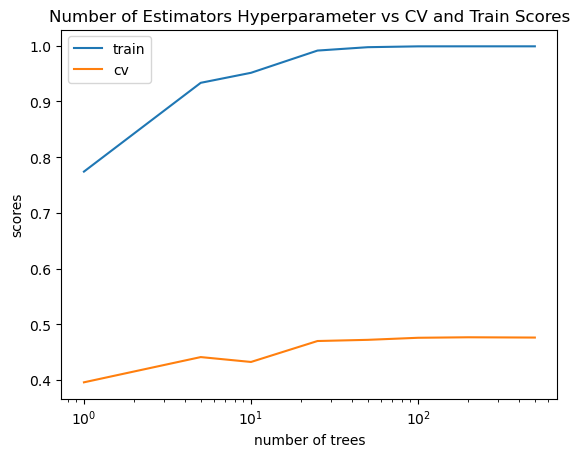

In [17]:
# Code adapted from Lecture 11
num_trees = [1, 5, 10, 25, 50, 100, 200, 500]
scoring_metric = 'f1'


train_scores = []
test_scores = []
for ntree in num_trees:
        model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=ntree))
        scores = cross_validate(
            model, X_train, y_train_ravel, return_train_score=True, scoring=scoring_metric
        )
        train_scores.append(np.mean(scores["train_score"]))
        test_scores.append(np.mean(scores["test_score"]))

plt.semilogx(num_trees, train_scores, label="train")
plt.semilogx(num_trees, test_scores, label="cv")
plt.legend()
plt.xlabel("number of trees")
plt.title("Number of Estimators Hyperparameter vs CV and Train Scores")
plt.ylabel("f1 scores") 
plt.show()



In [23]:
results_df = pd.DataFrame({
    'num_trees': num_trees,
    'train_f1_score': train_scores,
    'cv_f1_score': test_scores
})

display(results_df)

,num_trees,train_f1_score,cv_f1_score
0,1,0.774127,0.395832
1,5,0.933518,0.441141
2,10,0.951507,0.432391
3,25,0.991411,0.469984
4,50,0.997474,0.472101
5,100,0.998980,0.475807
6,200,0.999034,0.476693
7,500,0.999034,0.476193


We see that we achieve the highest validation f1 score of 0.4767 at 200 trees. Perhaps we could increase valalidation f1 score by further increasing the number of trees, but the f1 score increase does not seem worth it compared to the runtime increase. So 200 trees is our optimized hyperparameter value.

### Optimizing the SVC Classifier

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Adapted from Lecture 8
pipe = make_pipeline(preprocessor, SVC())
param_grid = {
    "svc__gamma": [0.001, 0.01, 0.1, 1.0, 10, 100],
    "svc__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
}
rs = RandomizedSearchCV(pipe, param_distributions=param_grid, n_jobs=-1, n_iter=8, return_train_score=True, random_state=123, scoring='f1')
rs.fit(X_train, y_train_ravel)
print("Best Score: " + str(rs.best_score_))
print("Best Gamma: " + str(rs.best_params_["svc__gamma"]))
print("Best C: " + str(rs.best_params_["svc__C"]))

C:\Users\thema\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score: 0.45578364699945795
Best Gamma: 0.01
Best C: 100


We get the best validation f1-score of 0.4558 with a gamma of 0.01 and C of 100. However, this does not beat the optimized Random Forest Classifier f1-scores.

### Optimizing the KNN Classifier

In [29]:
# Adapted from Lecture 4
results_dict = {
    "n_neighbors": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}
param_grid = {"n_neighbors": np.arange(2, 25, 1)}

for k in param_grid["n_neighbors"]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train.values.ravel(), return_train_score=True, scoring='f1')
    results_dict["n_neighbors"].append(k)

    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
    results_dict["std_cv_score"].append(scores["test_score"].std())
    results_dict["std_train_score"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("n_neighbors")
results_df

,mean_train_score,mean_cv_score,std_cv_score,std_train_score
n_neighbors,,,,
2,0.456696,0.180558,0.008181,0.004692
3,0.574455,0.276035,0.015071,0.006361
4,0.353366,0.181061,0.011174,0.003851
5,0.447514,0.248924,0.013437,0.003132
6,0.291317,0.168757,0.013972,0.007494
7,0.368930,0.228267,0.016046,0.003884
8,0.251227,0.161261,0.015035,0.004676
9,0.318722,0.208612,0.016322,0.007033
10,0.231247,0.155508,0.016348,0.008169


We get the best validation f1-score at 3 neighbors. However, this score i

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

Our best performing model was the Random Forest Classifier with n_estimators = 200.

In [28]:
# Predicting with the RFC on the tree

forest_classifier = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=200))
forest_classifier.fit(X_train, y_train_ravel)



# create classification report (code from lecture 9)
print(
    classification_report(
        y_test, forest_classifier.predict(X_test), target_names=["No default", "Default"], digits=4, zero_division=0
    )
)

# evaluate accuracy
pred = forest_classifier.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test,pred)}")


              precision    recall  f1-score   support

  No default     0.8407    0.9398    0.8875      7023
     Default     0.6319    0.3672    0.4645      1977

    accuracy                         0.8140      9000
   macro avg     0.7363    0.6535    0.6760      9000
weighted avg     0.7948    0.8140    0.7945      9000

Test Accuracy: 0.814


We see that we get a f1 score of 0.4645, which is roughly in line with what we got while optimizing the n_estimator hyperparameter. This, alongside the f1-scores increasing about as we would expect while increasing n_estimators, suggests the we did not have major issues with optimization bias. With our test data in line with what we expected, we can trust our test results to be able to generalize to unseen data.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using PrairieLearn.
4. Make sure that the plots and output are rendered properly in your submitted file.

This was a tricky one but you did it!